# О компании
Goal Zone - сеть фитнес-клубов в Канаде.
GoalZone предлагает широкий выбор фитнес-классов на 25 и 15 человек.
Некоторые занятия всегда полностью забронированы. При полном бронировании посещаемость занятий часто низкая.
GoalZone хочет увеличить количество мест, доступных для занятий.
Они хотят сделать это, предсказывая, посетит ли участник занятие или нет.
Если они могут предсказать, что участник не придет на занятие, они могут освободить другое место
.

## Подключение модулей


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

import warnings
warnings.filterwarnings("ignore")

## Загрузка данных

In [2]:
df = pd.read_csv('fitness_class.csv')
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


## Описание полей набора данных

booking_id - Уникальный идентификатор бронирования.

months_as_member - Количество месяцев в качестве участника данного фитнес-клуба, минимум 1 месяц.

weight - Вес участника в кг, округленный до 2 знаков после запятой.

days_before -  количество дней до начала занятий, на которые зарегистрировался участник.

day_of_week - День недели, в который проводятся занятия.

time - Время проведения занятий. Либо утром, либо вечером

category - Категория занятия фитнесом.

attended - Посещение занятия (значение 1 указывает на то, что участник присутствовал на занятии, 
значение 0 - участник отсутствовал на занятии)

## Разведочный анализ данных

In [3]:
df.shape


(1500, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [5]:
df.days_before.unique()

array(['8', '2', '14', '10', '6', '4', '9', '12', '5', '3', '7', '13',
       '12 days', '20', '1', '15', '6 days', '11', '13 days', '3 days',
       '16', '1 days', '7 days', '8 days', '10 days', '14 days', '17',
       '5 days', '2 days', '4 days', '29'], dtype=object)

In [6]:
df['days_before'] = df['days_before'].str.replace(' days', '').astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   int32  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 88.0+ KB


In [8]:
df.day_of_week.unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [9]:
replacements = {
    'Wednesday': 'Wed',
    'Monday': 'Mon',
    'Fri.': 'Fri'
}

df['day_of_week'] = df['day_of_week'].replace(replacements).astype('object') 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   int32  
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 88.0+ KB


In [11]:
df['weight']= df['weight'].fillna(df['weight'].mean())

In [12]:
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
del df["booking_id"]

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_member,1500.0,15.628667,12.926543,1.00,8.0000,12.000,19.0000,148.00
weight,1500.0,82.610378,12.680411,55.41,73.5625,81.035,89.3825,170.52
days_before,1500.0,8.346667,4.077938,1.00,4.0000,9.000,12.0000,29.00
attended,1500.0,0.302667,0.459565,0.00,0.0000,0.000,1.0000,1.00


In [16]:
df['day_of_week'] = df['day_of_week'].str[:3]

day_mapping = {
    'Mon': 1,
    'Tue': 2,
    'Wed': 3,
    'Thu': 4,
    'Fri': 5,
    'Sat': 6,
    'Sun': 7
}

df['day_of_week'] = df['day_of_week'].map(day_mapping)


In [17]:
category_mapping = {'Strength': 1, 'HIIT': 2, 'Cycling': 3, 'Yoga': 4, '-': 0, 'Aqua': 5}

df['category'] = df['category'].map(category_mapping)

In [18]:
df['category'].unique()

array([1, 2, 3, 4, 0, 5], dtype=int64)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_member,1500.0,15.628667,12.926543,1.00,8.0000,12.000,19.0000,148.00
weight,1500.0,82.610378,12.680411,55.41,73.5625,81.035,89.3825,170.52
days_before,1500.0,8.346667,4.077938,1.00,4.0000,9.000,12.0000,29.00
day_of_week,1500.0,4.105333,1.994214,1.00,2.0000,4.000,6.0000,7.00
category,1500.0,2.410000,1.043692,0.00,2.0000,2.000,3.0000,5.00
attended,1500.0,0.302667,0.459565,0.00,0.0000,0.000,1.0000,1.00


In [20]:
time_mapping = {'AM': 0, 'PM': 1}

df['time'] = df['time'].map(time_mapping)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_member,1500.0,15.628667,12.926543,1.00,8.0000,12.000,19.0000,148.00
weight,1500.0,82.610378,12.680411,55.41,73.5625,81.035,89.3825,170.52
days_before,1500.0,8.346667,4.077938,1.00,4.0000,9.000,12.0000,29.00
day_of_week,1500.0,4.105333,1.994214,1.00,2.0000,4.000,6.0000,7.00
time,1500.0,0.239333,0.426819,0.00,0.0000,0.000,0.0000,1.00
category,1500.0,2.410000,1.043692,0.00,2.0000,2.000,3.0000,5.00
attended,1500.0,0.302667,0.459565,0.00,0.0000,0.000,1.0000,1.00


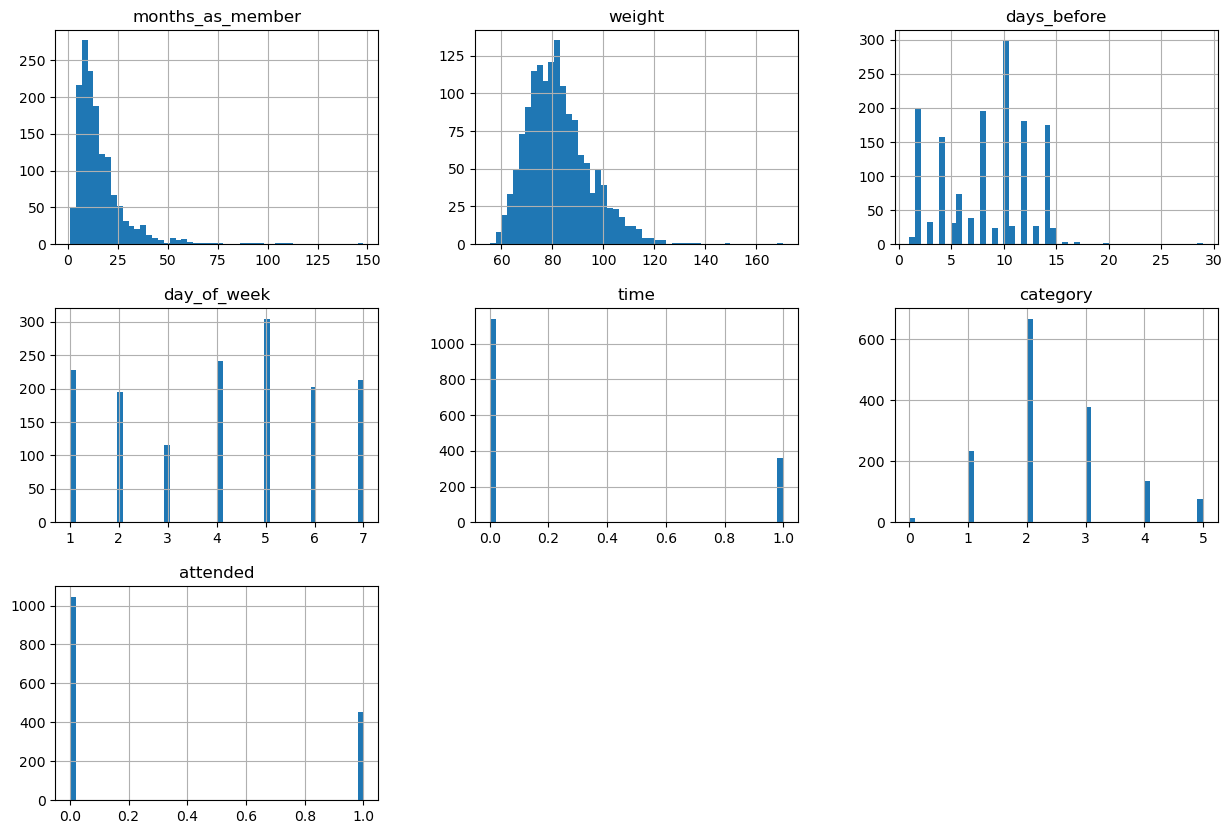

In [22]:
df.hist(figsize = (15,10), bins = 50);


• Большинство участников имеют стаж менее 25 месяцев, вес около 80-100 кг.

• Наблюдаются паттерны в регистрации на занятия, в зависимости от дня недели и времени.

• Большинство участников не посещают занятия, категория 2("Cycling") наиболее популярна.

In [23]:
features_names = ['months_as_member', 'weight', 'days_before', 'day_of_week', 'time', 'category', 
                  'attended']

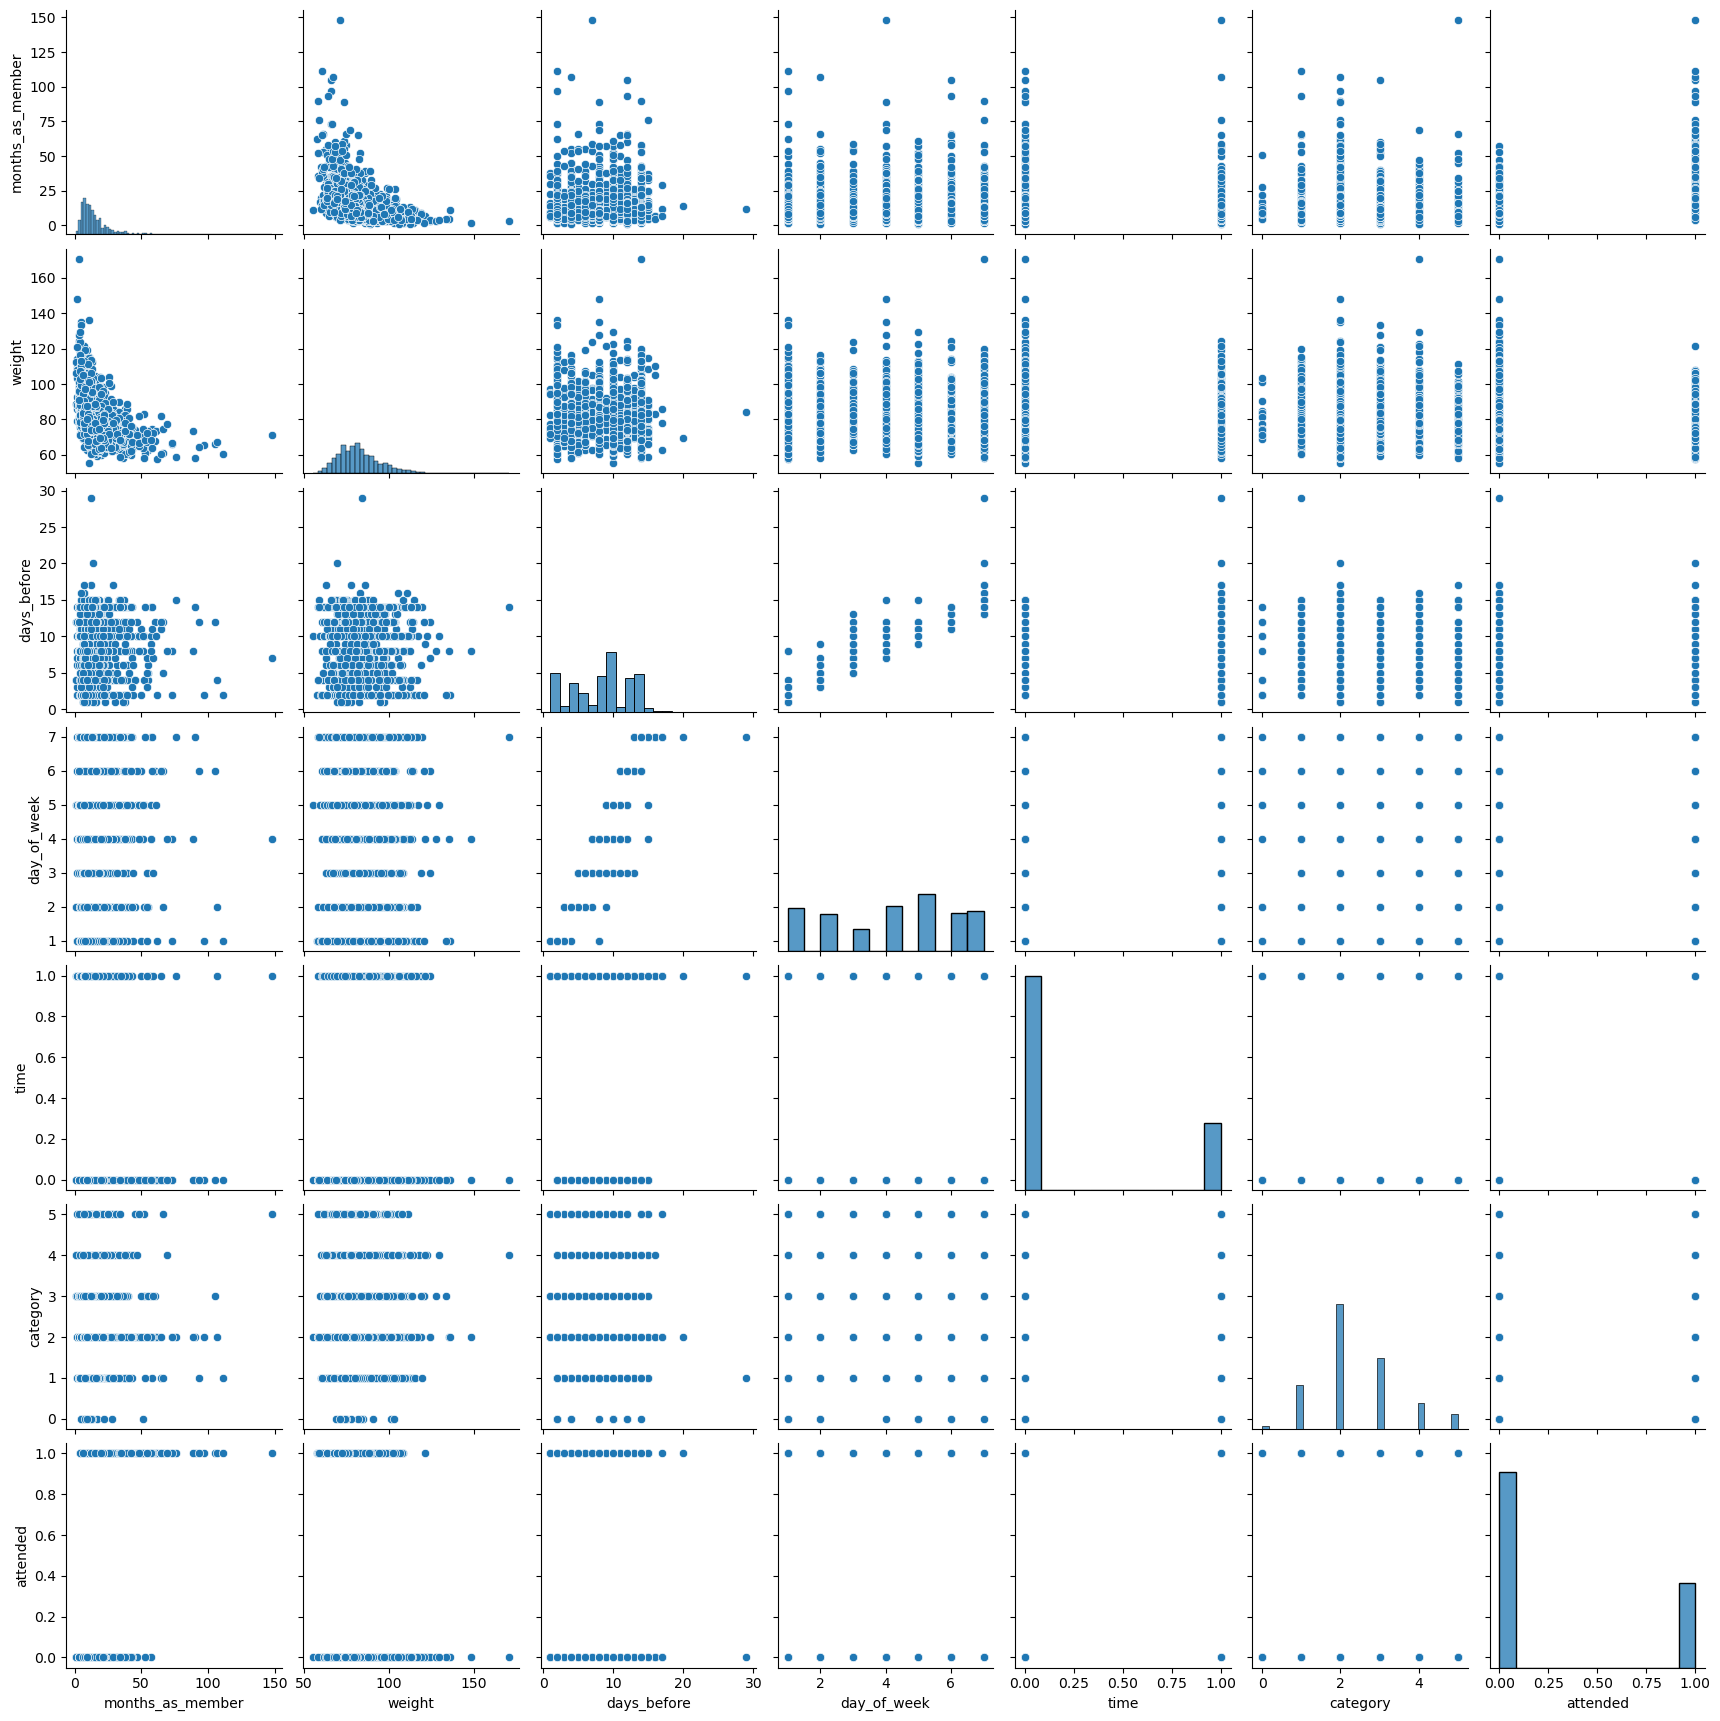

In [24]:
sns.pairplot(df[features_names])

Анализ данных показал небольшую положительную зависимость между днем недели __day_of_week__ и количеством дней до начала занятий __days_before__. Наблюдается, что чем больше дней до начала занятия, тем позднее день недели, в который оно проводится (например, ближе к концу недели). 

In [25]:
corr = df[['months_as_member', 'weight','days_before','day_of_week', 'time', 'category', 
                  'attended']].corr()
corr

,months_as_member,weight,days_before,day_of_week,time,category,attended
months_as_member,1.000000,-0.465594,0.003001,0.008920,-0.011570,0.017325,0.485526
weight,-0.465594,1.000000,0.001703,-0.001703,0.006460,0.019841,-0.283521
days_before,0.003001,0.001703,1.000000,0.980143,-0.051150,0.002163,0.024068
day_of_week,0.008920,-0.001703,0.980143,1.000000,-0.094690,0.002955,0.035070
time,-0.011570,0.006460,-0.051150,-0.094690,1.000000,0.008701,-0.049850
category,0.017325,0.019841,0.002163,0.002955,0.008701,1.000000,0.023450
attended,0.485526,-0.283521,0.024068,0.035070,-0.049850,0.023450,1.000000


<Axes: >

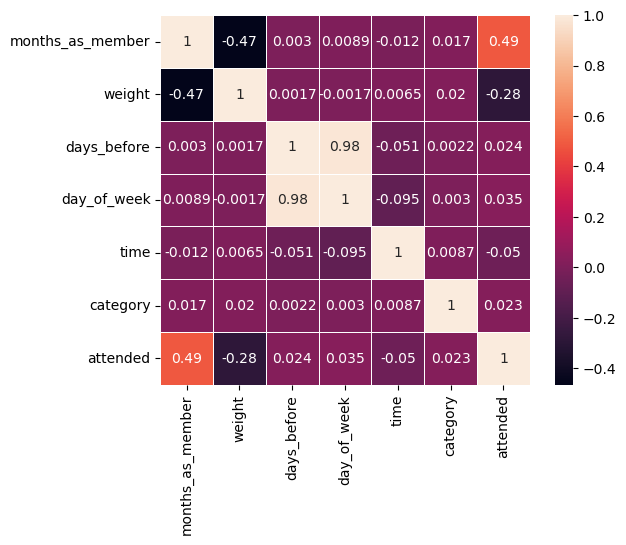

In [26]:
sns.heatmap(corr, square=True, annot=True, linewidths=.5)

Наблюдаем сильную зависимость между months_as_member и attende, также есть зависимости между weight и months_as_member, days_before и day_of_week

 Для решения поставленной задачи мы выбрали __бинарную классификацию__. Ее преимущества заключаются в:

    • Простота: Два класса, легко понять и реализовать.

    • Применение: Много областей, от спама до медицины.

    • Множество алгоритмов: Хорошо работает с различными алгоритмами.

    • Интерпретация: Результаты легко понять.

    • Оптимизация: Множество метрик для оценки качества.

### Формирование дата-сета для обучения моделей

In [27]:
X = pd.concat([df[features_names]], axis = 1)
X.shape

(1500, 7)

In [28]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['attended']
del X["attended"]

### Разделение набора данных

In [29]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1005, 6) (495, 6) (1005,) (495,)


Для обучения моделей мы используем следующие классификаторы: 

    _KNeighborsClassifier (KNN)_: Простой, интуитивный, подходит для нелинейных данных, Не требует обучения, не имеет стадии обучения(он просто запоминает все обучающие данные)

    _Random Forest Classifier_: Высокая точность, устойчив к переобучению, но вычислительно сложен.

    _Logistic Regression_: Прост, интерпретируемый, хорошо работает для линейно разделимых данных. 

### KNeighborsClassifier (Классификация ближайших соседей)

In [31]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 9 ms


KNeighborsClassifier()

In [32]:
C = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [33]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [34]:
knn_precision_score = precision_score(y_test, y_test_predict)
knn_precision_score

0.6173913043478261

In [35]:
y_pred = knn.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       327
           1       0.62      0.42      0.50       168

    accuracy                           0.72       495
   macro avg       0.68      0.64      0.65       495
weighted avg       0.70      0.72      0.70       495



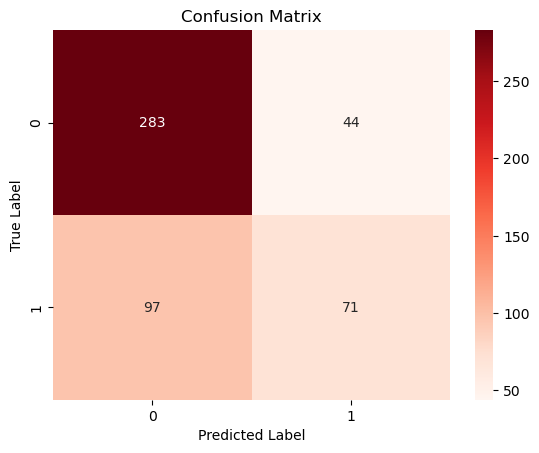

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

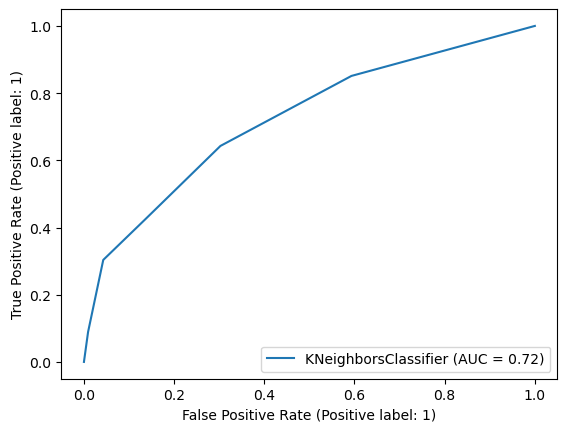

In [37]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)


### Random Forest Classifier (Классификатор дерева решений)

In [38]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 656 ms
Wall time: 380 ms


In [39]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [40]:
rfc_precision_score = precision_score(y_test, rfc_pred_test)
rfc_precision_score

0.7058823529411765

In [41]:
y_pred = rfc.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.82       327
           1       0.71      0.43      0.53       168

    accuracy                           0.75       495
   macro avg       0.73      0.67      0.68       495
weighted avg       0.74      0.75      0.73       495



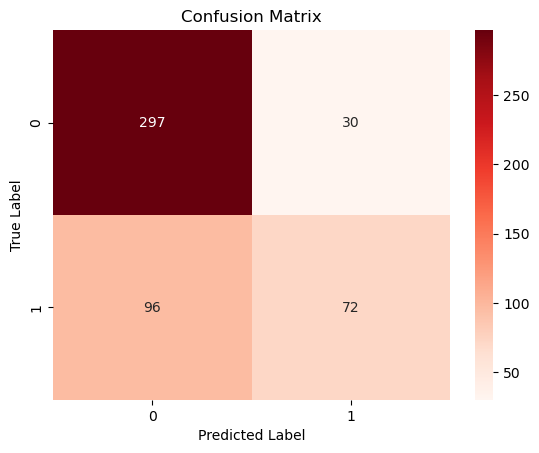

In [42]:
y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

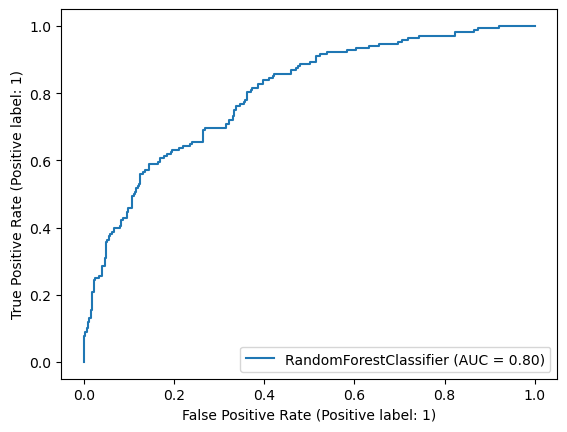

In [43]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

### Logistic Regression (Логистическая регрессия)

In [65]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 11 ms


LogisticRegression(random_state=42)

In [66]:
lr_pred_test = lr.predict(X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [67]:
lr_precision_score = precision_score(y_test, rfc_pred_test)
lr_precision_score

0.7058823529411765

In [68]:
y_pred = lr.predict(X_test) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       327
           1       0.78      0.36      0.49       168

    accuracy                           0.75       495
   macro avg       0.76      0.65      0.66       495
weighted avg       0.75      0.75      0.72       495



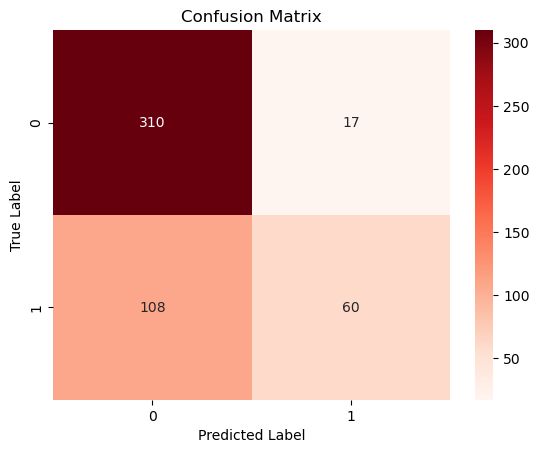

In [49]:
y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


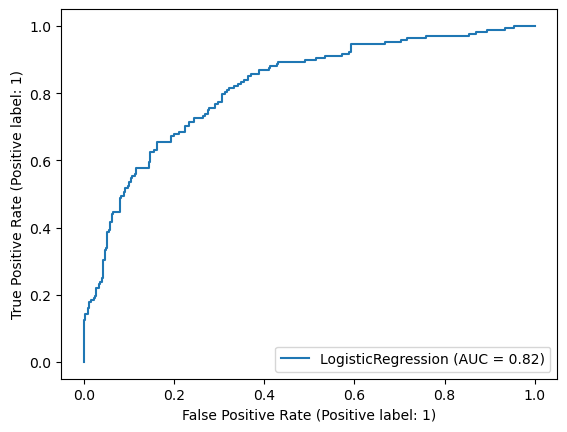

In [50]:

svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

### Метрики классификации

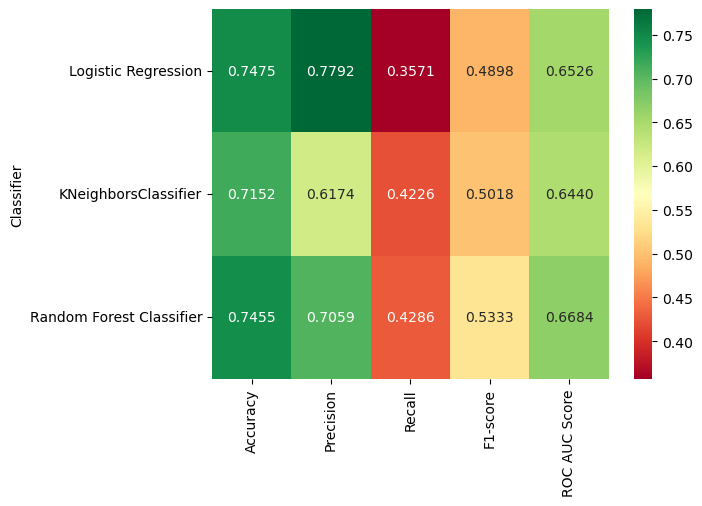

In [51]:
log = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-score", "ROC AUC Score"])
log["Classifier"] = ["KNeighborsClassifier", "Random Forest Classifier", "Logistic Regression"]
log["Accuracy"] = [
    accuracy_score(y_test, knn_pred_test),
    accuracy_score(y_test, rfc_pred_test),
    accuracy_score(y_test, lr_pred_test)
   
]

log["Precision"] = [     
    precision_score(y_test, knn_pred_test), 
    precision_score(y_test, rfc_pred_test),
    precision_score(y_test, lr_pred_test)
]

log["Recall"] = [
    recall_score(y_test, knn_pred_test), 
    recall_score(y_test, rfc_pred_test),
    recall_score(y_test, lr_pred_test)
]

log["F1-score"] = [
    f1_score(y_test, knn_pred_test), 
    f1_score(y_test, rfc_pred_test),
    f1_score(y_test, lr_pred_test)
]


log["ROC AUC Score"] = [
    roc_auc_score(y_test, knn_pred_test),
    roc_auc_score(y_test, rfc_pred_test),
    roc_auc_score(y_test, lr_pred_test)
]

log.set_index("Classifier", inplace=True)
log.sort_values("F1-score", inplace=True)
sns.heatmap(log, annot=True, fmt=".4f", cmap="RdYlGn");

In [52]:
classifiers =["KNeighborsClassifier", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Precision_score"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Precision_score"] = [knn_precision_score, rfc_precision_score, lr_precision_score]


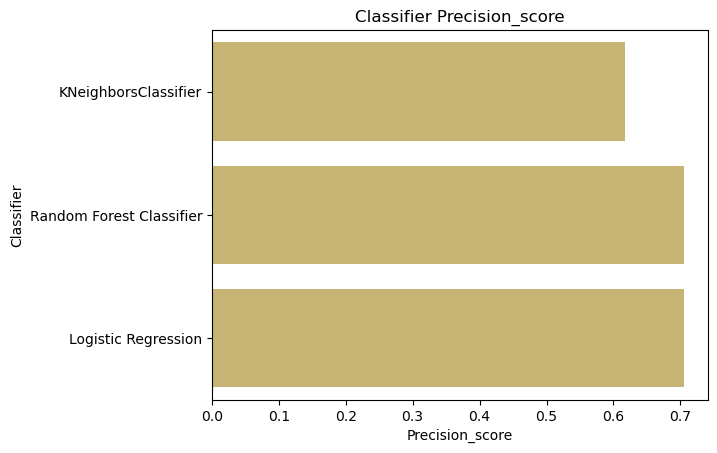

In [53]:
plt.xlabel('Precision_score')
plt.title('Classifier Precision_score')

sns.set_color_codes("muted")
sns.barplot(x='Precision_score', y='Classifier', data=log.sort_values(by='Precision_score'), color="y");

Наилучшую точность по метке(Precision) показала модель Logistic Regression с результатом 0.77922. Другие модели также показали хорошие результаты

## Настройка гиперпараметров

Настроим гиперпараметры для модели LogisticRegression с параметрами random_state и C

random_state - это параметр, который устанавливает начальное значение генератора случайных чисел.

C - это параметр регуляризации, который отвечает за степень регуляризации модели.

In [62]:
param_grid = {  
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'],  # 'liblinear' поддерживает l1 и l2  
    'max_iter': [100, 200, 300],  
    'class_weight': [None, 'balanced']  
}  
logist = LogisticRegression(random_state = 0)

grid_search = GridSearchCV(estimator=logist, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)


print("Лучший параметр C: ", grid_search.best_params_['C'])
print("Лучший параметр penalty:", grid_search.best_params_['penalty'])  
print("Лучший параметр solver:", grid_search.best_params_['solver'])  
print("Лучший parameter max_iter:", grid_search.best_params_['max_iter'])  
print("Лучший параметр class_weight:", grid_search.best_params_['class_weight'])  

Лучший параметр C:  0.01
Лучший параметр penalty: l2
Лучший параметр solver: liblinear
Лучший parameter max_iter: 100
Лучший параметр class_weight: None


## Обучение новой модели, с гиперпараметрами

In [72]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression(random_state = 0, C = 1, penalty = 'l2', solver = 'liblinear', class_weight =None)
 
lr.fit(X_train, y_train)
lr_pred_test = lr.predict(X_test)

In [73]:
precision_score(y_test, lr_pred_test)
res = precision_score(y_test, lr_pred_test)
print(res)

0.7792207792207793


In [74]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       327
           1       0.78      0.36      0.49       168

    accuracy                           0.75       495
   macro avg       0.76      0.65      0.66       495
weighted avg       0.75      0.75      0.72       495



модель до улучшения:

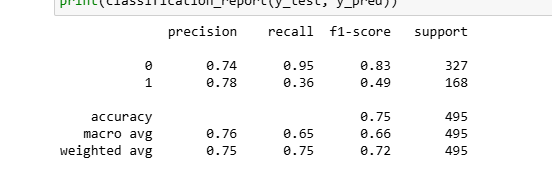

Видим что после настройки гиперпараметров модель не улучшилась

## Вывод

-Визуализировали корреляции между переменными, выявили важные зависимости.


-Гистограммы показали распределение данных, выявили выбросы и паттерны.


-Применили алгоритмы (к-близжайшие соседи, логистическая регрессия, случайные леса и наивный байес). Использовали кросс-валидацию для проверки стабильности моделей.
- Наилучшую точность показала модель __Logistic Regression__ с результатом 0.77922. 
    Другие модели также показали хорошие результаты.
    После применения гиперпараметров выбранная модель не изменила свои показатели
    


-Рассчитали точность, полноту и F1-меру для оценки качества классификаторов.

Анализ данных помог лучше понять поведение клиентов и выявить ключевые факторы для улучшения работы фитнес-клубов. 